# <a>Projeto 1 - Análise Exploratória de Dados</a>

*Let's Data - Jornada Cientista da Dados*

## <a> Motivação </a>

Todo trabalho de Ciência de Dados passa por essa importante etapa. Conhecer bem os dados, saber as distribuições, medidas estatísticas principais, visualizar correlações e evoluções é essencial para gerar insights e solucionar problemas.

Essa etapa é bem *híbrida* no sentido em que pode ser utilizada sem um objetivo completamente definido, numa busca por informações e insights. De outro lado, num projeto com objetivo de negócio bem definido (fase 1 do CRISP-DM), ela é bem focalizada nas perguntas de negócio que queremos responder

## <a> Objeto de Estudo </a>

Vamos trabalhar com informações de microdados no ENEM realizado em 2019. De acordo com o site do [INEP](https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem), o ENEM tem o objetivo de avaliar o desempenho escolar dos estudantes ao término da educação básica. As notas do Enem podem ser usadas para acesso ao Sistema de Seleção Unificada (Sisu) e ao Programa Universidade para Todos (ProUni). Elas também são aceitas em mais de 50 instituições de educação superior portuguesas. Além disso, os participantes do Enem podem pleitear financiamento estudantil em programas do governo, como o Fundo de Financiamento Estudantil (Fies). Os resultados do Enem possibilitam, ainda, o desenvolvimento de estudos e indicadores educacionais.[1](https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem)

Conhecer bem os dados dos aplicantes para a prova pode fornecer insights preciosos para a educação brasileira. Para o presente estudo vamos avaliar se dados demográficos, indicadores sociais, de escolaridade dos pais e outras indicações tem correlações com as notas dos candidatos. Muitos insights e respostas podem ser obtidas somente com a análise exploratória de dados.

Então chega de blá blá blá e vamos por a mão na massa!

foco nas notas dos candidatos

Entender quais as características dos candidatos tem alguma relação com a nota pode trazer muito conhecimento extraído dos dados

Algumas hipóteses como: o Sexo do candidato influencia na nota ? Renda ? Etnia ? Escolaridade ? 


### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from string import ascii_uppercase 

### Configs

In [2]:
# Configurando o número de colunas mostrado
pd.set_option('display.max_columns',None)
# Configurando pandas para não mostrar notação cientifica para os números
pd.set_option('display.float_format',lambda x: '%.2f'%x)

### Fazendo a leitura dos dados

In [3]:
df_raw = pd.read_parquet(r'..\Projeto_1\dados\MICRODADOS_ENEM_2019.parquet')

## <a> Observando os dados e fazendo algumas verificações <a>

In [4]:
df_raw.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,13,M,1,3,1,1,11,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,3552205,Sorocaba,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,8,M,1,1,1,1,5,1,1.00,0,NaN,None,NaN,None,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,13,F,1,3,1,1,13,1,1.00,0,NaN,None,NaN,None,NaN,NaN,NaN,2304400,Fortaleza,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,10,F,1,1,1,1,4,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,1721000,Palmas,17,TO,1,1,1,1,504.00,510.00,513.00,516.00,483.80,503.60,537.30,392.00,BACCEEBEECDBEDDAEECDEDEADEBBCDBCAACADEEACCBBD,AECEDADAABAADBAADAEBACBAECCDAEADCDBBECCEDABCD,99999AAABEBBCCBDCAEECADBACAADAECCCDCCBAEBDEEEA...,DDBBBBCDCCDCAECCBBECDAEBADCD..CABCCECAEBDBBDA,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,7,F,1,1,1,1,4,1,1.00,0,NaN,None,NaN,None,NaN,NaN,NaN,3118601,Contagem,31,MG,1,1,1,1,504.00,510.00,513.00,516.00,513.60,575.50,570.70,677.00,EEBEDEEEEEBDCEEBEEEEABEEBEEBAEDEECECCDBCECEAE,EEDCCEDDBCBEABAAABADCEDABDBBCBDCCCCDAEDEDBDCB,ABBBE99999ABBCACCCAEEEDCCDADCCAEDEDDEEDBBDECBD...,CDEEEEEAEECBABABCDCACEEEEEEDEEACEAEDEBEEECEDE,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095171 entries, 0 to 5095170
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [6]:
df_raw.shape

(5095171, 76)

In [7]:
len(df_raw['NU_INSCRICAO'])

5095171

In [8]:
df_raw.dtypes

NU_INSCRICAO        int64
NU_ANO              int64
TP_FAIXA_ETARIA     int64
TP_SEXO            object
TP_ESTADO_CIVIL     int64
                    ...  
Q021               object
Q022               object
Q023               object
Q024               object
Q025               object
Length: 76, dtype: object

## <a> Limpando os dados <a>

### Removendo colunas que não são de interesse

In [9]:
# Agrupando colunas de respostas em uma variavel só
coluna_questoes = [coluna for coluna in df_raw.columns if coluna.startswith('TX_')]
coluna_questoes

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [10]:
# Agrupando colunas de códigos em uma variavel só
coluna_codigos = [coluna for coluna in df_raw.columns if coluna.startswith('CO_')]
coluna_codigos

['CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [11]:
# Agrupando colunas de municipio em uma variavel só
coluna_municipios = [coluna for coluna in df_raw.columns if 'MUNICIPIO' in coluna]
coluna_municipios

['CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [12]:
# Removendo todas as colunas anteriores de uma vez 

colunas_remover = coluna_questoes + coluna_codigos + coluna_municipios + ['NU_INSCRICAO', 'NU_ANO']

df_enem = df_raw.drop(colunas_remover,axis=1)
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,13,M,1,3,1,1,11,1,NaN,0,None,NaN,NaN,NaN,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,8,M,1,1,1,1,5,1,1.00,0,None,NaN,NaN,NaN,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,13,F,1,3,1,1,13,1,1.00,0,None,NaN,NaN,NaN,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,10,F,1,1,1,1,4,1,NaN,0,None,NaN,NaN,NaN,TO,1,1,1,1,483.80,503.60,537.30,392.00,1,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,7,F,1,1,1,1,4,1,1.00,0,None,NaN,NaN,NaN,MG,1,1,1,1,513.60,575.50,570.70,677.00,0,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B


## <a> Começando com a estatística descritiva </a>

Conhecer bem as medidas estatísticas, de tendência central, dispersão, separatrizes, distribuições, é essencial para conhecermos melhor os dados em que estamos trabalhando. Qual a distribuição por sexo? Raça? Localização geográfica?

In [13]:
# Visualizando medidas estatisticas 
df_enem.describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,5095171.00,5095171.00,5095171.00,5095171.00,5095171.00,5095171.00,5095171.00,2878135.00,5095171.00,1147387.00,1147387.00,1147387.00,5095171.00,5095171.00,5095171.00,5095171.00,3710335.00,3923046.00,3923046.00,3710335.00,5095171.00,3923045.00,3923045.00,3923045.00,3923045.00,3923045.00,3923045.00,3923045.00,5095171.00
mean,5.69,1.08,2.13,1.03,1.54,2.96,1.33,1.00,0.12,2.25,1.04,1.01,0.73,0.77,0.77,0.73,477.82,507.25,520.52,523.12,0.52,1.14,120.48,122.74,114.81,121.63,91.53,571.19,3.87
std,3.99,0.44,1.02,0.21,0.72,4.11,0.55,0.07,0.33,0.75,0.19,0.12,0.45,0.42,0.42,0.45,76.10,82.41,64.15,109.06,0.50,0.79,33.43,42.93,40.18,38.12,59.44,188.76,1.48
min,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,3.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,1.00,1.00,0.00,417.80,447.90,483.50,435.10,0.00,1.00,120.00,120.00,100.00,100.00,40.00,480.00,3.00
50%,4.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,0.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,470.30,510.60,526.20,501.10,1.00,1.00,120.00,120.00,120.00,120.00,100.00,580.00,4.00
75%,9.00,1.00,3.00,1.00,2.00,4.00,2.00,1.00,0.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,533.20,566.60,565.30,597.80,1.00,1.00,140.00,140.00,140.00,140.00,140.00,680.00,5.00
max,20.00,4.00,5.00,4.00,4.00,13.00,3.00,2.00,1.00,4.00,2.00,4.00,2.00,2.00,2.00,2.00,860.90,835.10,801.70,985.50,1.00,9.00,200.00,200.00,200.00,200.00,200.00,1000.00,20.00


In [14]:
# Agrupando todas as colunas de notas em uma só variável
coluna_notas = [coluna for coluna in df_enem if 'NOTA' in coluna]
coluna_notas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

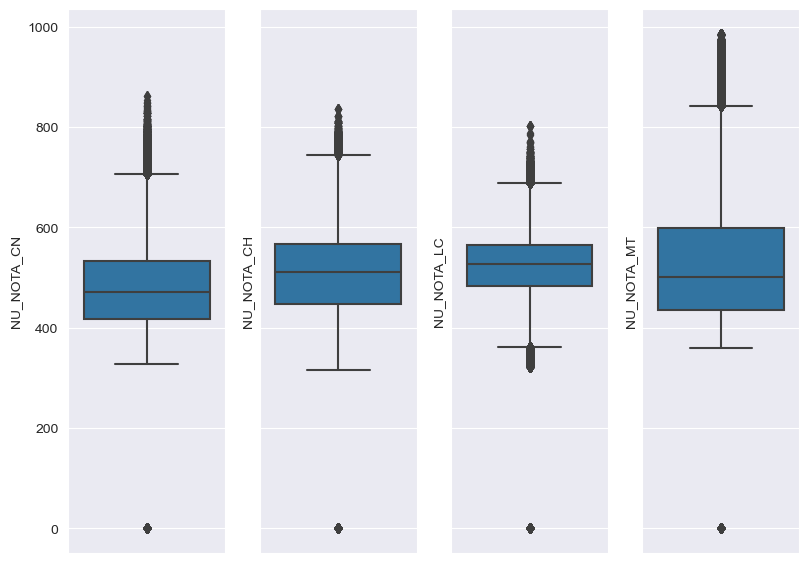

In [15]:
# Análisando as notas gráficamente

sns.set_style('darkgrid')
figura,graficos = plt.subplots(1,4,sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = coluna_notas[i]
    sns.boxplot(data=df_enem, y=coluna_1, ax=graficos[i])

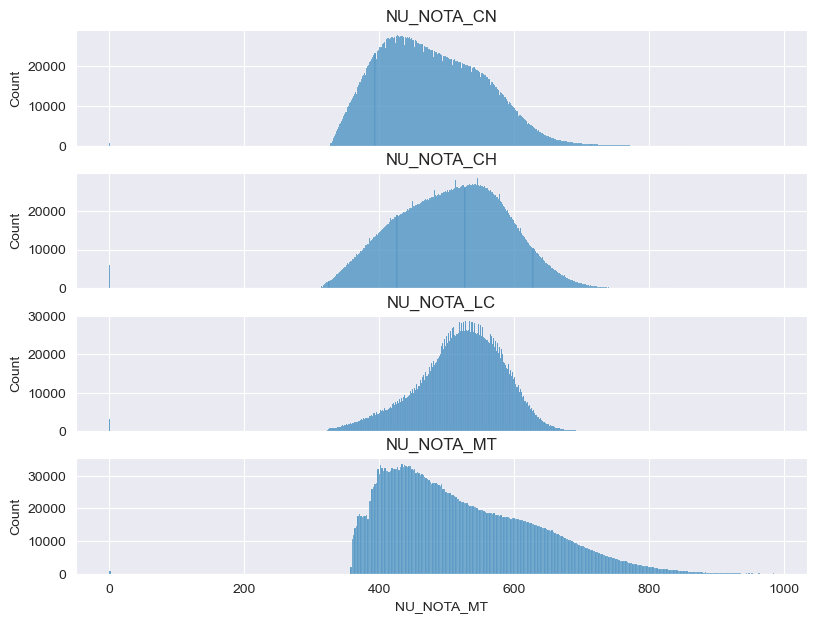

In [16]:
# Análisando as distribuições das notas 

sns.set_style('darkgrid')

figura,graficos = plt.subplots(4,1,sharex=True,figsize=(8,6),)

plt.tight_layout()

for i in range(4):
    coluna_1 = coluna_notas[i]
    sns.histplot(data=df_enem[coluna_1],ax=graficos[i]).set_title(coluna_1)

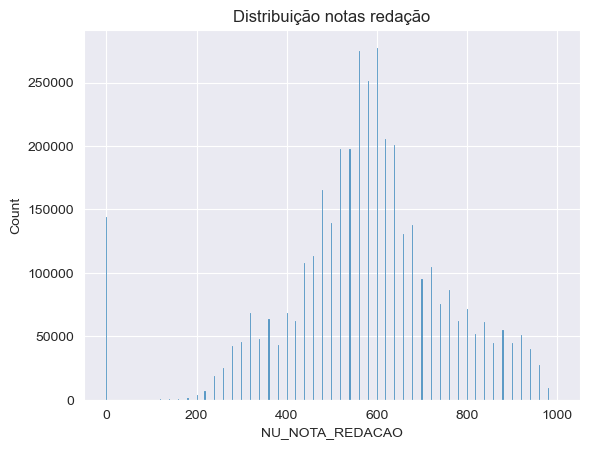

In [17]:
# Análise da nota das redações 

sns.histplot(data=df_enem['NU_NOTA_REDACAO']).set_title('Distribuição notas redação');

Text(0.5, 1.0, 'NU_NOTA_REDAÇÃO')

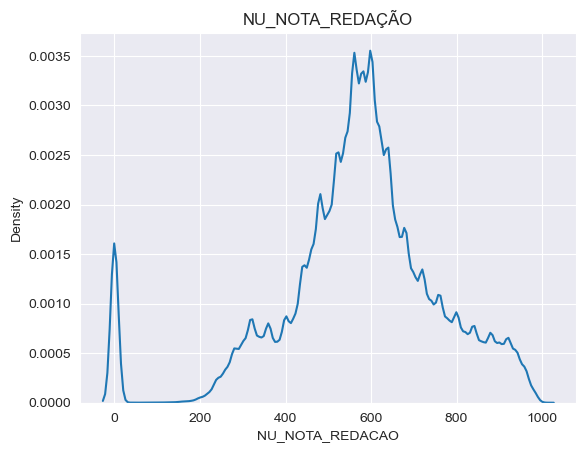

In [18]:
# O gráfico anterior não ficou legal porque as notas não são muito esparsas, vamos tentar um gráfico diferente
sns.kdeplot(data=df_enem['NU_NOTA_REDACAO']).set_title('NU_NOTA_REDAÇÃO')

## <a>  Analisando as informações demográficas <a>

In [19]:
# Revendo como esta o DF
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,13,M,1,3,1,1,11,1,NaN,0,None,NaN,NaN,NaN,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,8,M,1,1,1,1,5,1,1.00,0,None,NaN,NaN,NaN,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,13,F,1,3,1,1,13,1,1.00,0,None,NaN,NaN,NaN,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,10,F,1,1,1,1,4,1,NaN,0,None,NaN,NaN,NaN,TO,1,1,1,1,483.80,503.60,537.30,392.00,1,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,7,F,1,1,1,1,4,1,1.00,0,None,NaN,NaN,NaN,MG,1,1,1,1,513.60,575.50,570.70,677.00,0,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B


Faixa etária (TP_FAIXA_ETARIA):
* 1 --  Menor de 17 anos 
* 2 --  17 anos
* 3	--  18 anos
* 4	--  19 anos
* 5	--  20 anos
* 6	--  21 anos
* 7	--  22 anos
* 8	--  23 anos
* 9	--  24 anos
* 10 -- 25 anos
* 11 -- Entre 26 e 30 anos
* 12 -- Entre 31 e 35 anos
* 13 -- Entre 36 e 40 anos
* 14 -- Entre 41 e 45 anos
* 15 -- Entre 46 e 50 anos
* 16 -- Entre 51 e 55 anos
* 17 -- Entre 56 e 60 anos
* 18 -- Entre 61 e 65 anos
* 19 -- Entre 66 e 70 anos
* 20 -- Maior de 70 anos

### Análisando informações de faixa etária 

In [20]:
# Análisando a nota da redação
df_enem['TP_FAIXA_ETARIA'].value_counts().sort_index()

1     400661
2     847284
3     864166
4     577155
5     409378
6     290307
7     233034
8     187679
9     156259
10    128038
11    403776
12    235044
13    158944
14     93328
15     55930
16     31186
17     14743
18      5623
19      1919
20       717
Name: TP_FAIXA_ETARIA, dtype: int64

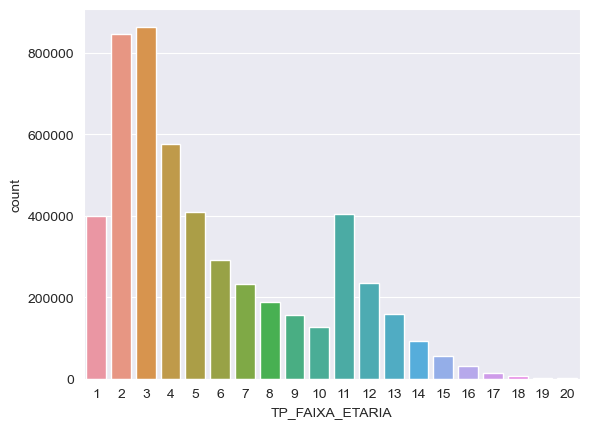

In [21]:
# porcentagem 
sns.countplot(data=df_enem,x='TP_FAIXA_ETARIA',);

### Análisando as diferenças entre sexos

In [22]:
# Valor nominal
df_enem['TP_SEXO'].value_counts()

F    3031760
M    2063411
Name: TP_SEXO, dtype: int64

In [23]:
# Valor em porcentagem 
df_enem['TP_SEXO'].value_counts(normalize=True)*100

F   59.50
M   40.50
Name: TP_SEXO, dtype: float64

<AxesSubplot: xlabel='TP_SEXO', ylabel='count'>

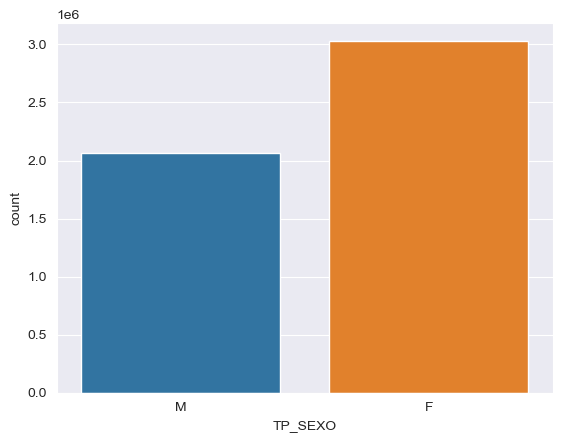

In [24]:
# Visualizando gráficamente
sns.countplot(data=df_enem,x='TP_SEXO')

### Análisando o estado civil dos participantes


Estado civil

* 0 Não informado
* 1 Solteiro(a)
* 2 Casado(a)/Mora com companheiro(a)
* 3 Divorciado(a)/Desquitado(a)/Separado(a)
* 4 Viúvo(a)

In [25]:
# Valores nominais
df_enem['TP_ESTADO_CIVIL'].value_counts().sort_index()

0     206796
1    4398396
2     395851
3      87892
4       6236
Name: TP_ESTADO_CIVIL, dtype: int64

<AxesSubplot: xlabel='TP_ESTADO_CIVIL', ylabel='count'>

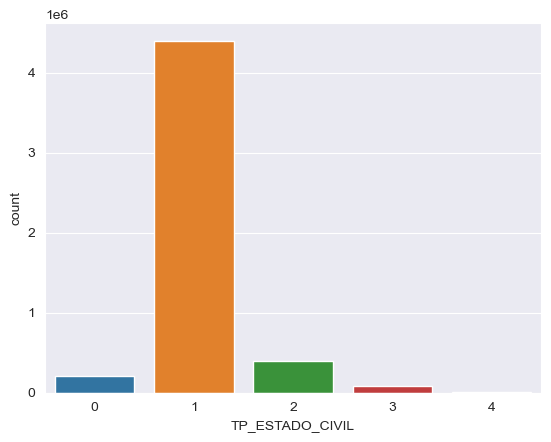

In [26]:
# Visualizando gráficamente
sns.countplot(data=df_enem,x='TP_ESTADO_CIVIL')

### Análisando a etnia declarada

Etnia

* 0 Não declarado
* 1 Branca
* 2 Preta
* 3 Parda
* 4 Amarela
* 5 Indígena 

In [27]:
# Valores nominais
df_enem['TP_COR_RACA'].value_counts().sort_index()

0     103199
1    1831750
2     648298
3    2364011
4     116157
5      31756
Name: TP_COR_RACA, dtype: int64

<AxesSubplot: xlabel='TP_COR_RACA', ylabel='count'>

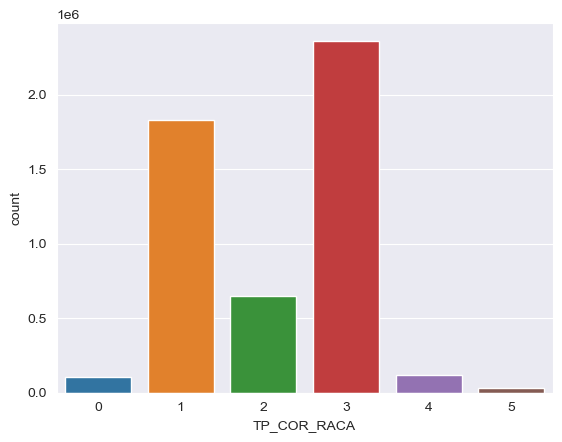

In [28]:
# Visualizando gráficamente
sns.countplot(data=df_enem,x='TP_COR_RACA')

### Visualizando a distribuição geografica dos participantes

In [29]:
ufs = df_enem['SG_UF_PROVA'].value_counts()
ufs

SP    815990
MG    534625
BA    395427
RJ    339716
CE    294984
PA    279593
PE    275317
RS    218469
MA    218074
PR    211306
GO    169980
PB    147176
PI    122312
RN    119319
AM    118144
SC    110699
ES    102273
DF     95849
AL     89824
MT     88121
SE     78488
MS     70393
RO     58639
TO     46249
AP     42603
AC     38645
RR     12956
Name: SG_UF_PROVA, dtype: int64

### Criando um DF com as regiões e o número de candidatos

In [30]:
# Criando DF, usando um dicionário
df_ufs = pd.DataFrame({'uf':ufs.index,'candidatos':ufs.values})

In [31]:
df_ufs.head()

,uf,candidatos
0,SP,815990
1,MG,534625
2,BA,395427
3,RJ,339716
4,CE,294984


In [32]:
# Visualizando gráficamente
fig = px.treemap(data_frame=df_ufs,
    path = ['uf'],
    values = 'candidatos'
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

## <a>Observando a quantidade de pais com nível superior  <a>

 Até que série seu pai, ou o homem responsável por você, estudou?


- A -- Nunca estudou.
- B -- Não completou a 4ª série/5º ano do Ensino Fundamental.
- C -- Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
- D -- Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
- E -- Completou o Ensino Médio, mas não completou a Faculdade.
- F -- Completou a Faculdade, mas não completou a Pós-graduação.
- G -- Completou a Pós-graduação.
- H -- Não sei.

In [33]:
# Verificando a quantidade de cada resposta
df_enem['Q001'].value_counts().sort_index()

A     290612
B    1135800
C     723504
D     586610
E    1308970
F     375707
G     229177
H     444791
Name: Q001, dtype: int64

In [34]:
# Avaliando o impacto nos dados daqueles que responderam: "não sei"
len(df_enem.loc[df_enem['Q001']=='H'])/df_enem.shape[0]

0.08729657944748076

 Até que série sua mãe, ou mulher responsável por você, estudou?


- A -- Nunca estudou.
- B -- Não completou a 4ª série/5º ano do Ensino Fundamental.
- C -- Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
- D -- Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
- E -- Completou o Ensino Médio, mas não completou a Faculdade.
- F -- Completou a Faculdade, mas não completou a Pós-graduação.
- G -- Completou a Pós-graduação.
- H -- Não sei.

In [35]:
# Verificando a quantidade de cada resposta
df_enem['Q002'].value_counts().sort_index()

A     194620
B     854819
C     686182
D     667400
E    1633666
F     513696
G     399459
H     145329
Name: Q002, dtype: int64

In [36]:
# Avaliando o impacto nos dados daqueles que responderam: "não sei"
len(df_enem.loc[df_enem['Q002']=='H'])/df_enem.shape[0]

0.02852288961449969

In [37]:
# Criando novas variáveis para delimitar pais que possuem nível superior
df_enem['pai_possui_superior'] = df_enem['Q001'].isin(['F','G'])
df_enem['mae_possui_superior'] = df_enem['Q002'].isin(['F','G'])

# visualizando se as novas variáveis foram construidas 
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pai_possui_superior,mae_possui_superior
0,13,M,1,3,1,1,11,1,NaN,0,None,NaN,NaN,NaN,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B,False,False
1,8,M,1,1,1,1,5,1,1.00,0,None,NaN,NaN,NaN,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B,False,False
2,13,F,1,3,1,1,13,1,1.00,0,None,NaN,NaN,NaN,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B,False,False
3,10,F,1,1,1,1,4,1,NaN,0,None,NaN,NaN,NaN,TO,1,1,1,1,483.80,503.60,537.30,392.00,1,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B,False,False
4,7,F,1,1,1,1,4,1,1.00,0,None,NaN,NaN,NaN,MG,1,1,1,1,513.60,575.50,570.70,677.00,0,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B,False,False


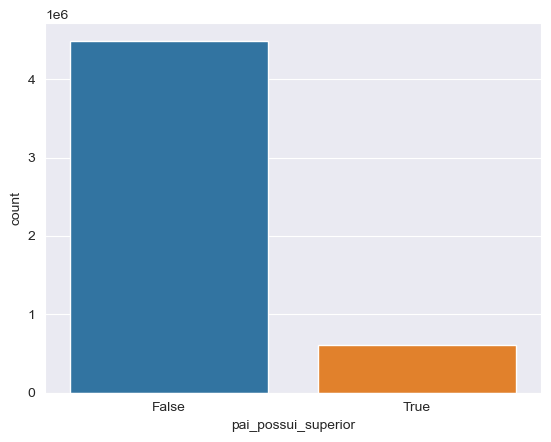

In [38]:
# Até que série seu pai, ou homem responsável por você, estudou ? 
sns.countplot(data=df_enem, x='pai_possui_superior');

In [39]:
# Observando em porcentagem
df_enem['pai_possui_superior'].value_counts(normalize=True)*100

False   88.13
True    11.87
Name: pai_possui_superior, dtype: float64

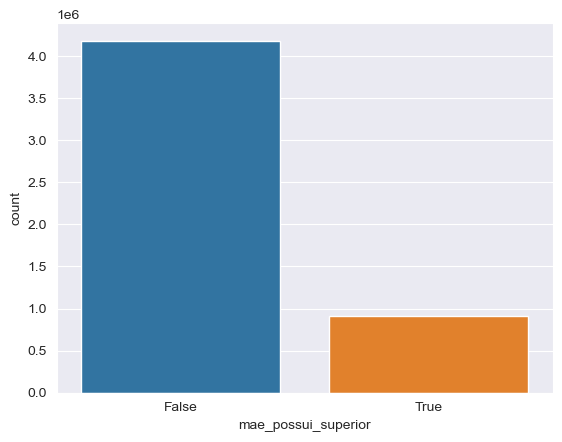

In [40]:
# Até que série sua mãe, ou a mulher responsável por você, estudou ? 
sns.countplot(data=df_enem, x='mae_possui_superior');

In [41]:
# Observando em porcentagem
df_enem['mae_possui_superior'].value_counts(normalize=True)*100

False   82.08
True    17.92
Name: mae_possui_superior, dtype: float64

## <a>Analisar a renda familiar. Vamos transformar Q006 em algo numérico?
<a>

 
- A Nenhuma renda.
- B Até R$ 998,00.
- C De R$ 998,01 até R$ 1.497,00.
- D De R$ 1.497,01 até R$ 1.996,00.
- E De R$ 1.996,01 até R$ 2.495,00.
- F De R$ 2.495,01 até R$ 2.994,00.
- G De R$ 2.994,01 até R$ 3.992,00.
- H De R$ 3.992,01 até R$ 4.990,00.
- I De R$ 4.990,01 até R$ 5.988,00.
- J De R$ 5.988,01 até R$ 6.986,00.
- K De R$ 6.986,01 até R$ 7.984,00.
- L De R$ 7.984,01 até R$ 8.982,00.
- M De R$ 8.982,01 até R$ 9.980,00.
- N De R$ 9.980,01 até R$ 11.976,00.
- O De R$ 11.976,01 até R$ 14.970,00.
- P De R$ 14.970,01 até R$ 19.960,00.
- Q Mais de R$ 19.960,00.

In [42]:
# Criando um dicionário vazio
dicionario_renda = dict()

# iterando sobre o alfabeto
for i, letra in enumerate(ascii_uppercase):
    if i==17:
        break
    dicionario_renda[letra] = i

# função de mapeamento
df_enem['renda_familiar'] = df_enem['Q006'].map(dicionario_renda)

df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pai_possui_superior,mae_possui_superior,renda_familiar
0,13,M,1,3,1,1,11,1,NaN,0,None,NaN,NaN,NaN,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B,False,False,0
1,8,M,1,1,1,1,5,1,1.00,0,None,NaN,NaN,NaN,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B,False,False,2
2,13,F,1,3,1,1,13,1,1.00,0,None,NaN,NaN,NaN,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B,False,False,1
3,10,F,1,1,1,1,4,1,NaN,0,None,NaN,NaN,NaN,TO,1,1,1,1,483.80,503.60,537.30,392.00,1,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B,False,False,4
4,7,F,1,1,1,1,4,1,1.00,0,None,NaN,NaN,NaN,MG,1,1,1,1,513.60,575.50,570.70,677.00,0,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B,False,False,6


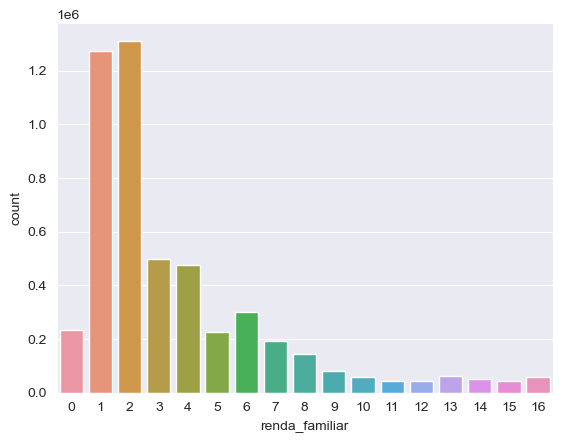

In [43]:
# Análise gráfica da renda 
sns.countplot(data=df_enem,x='renda_familiar');

## <a> Relacionar notas com características dos candidatos </a>

Avaliar se as notas dos candidatos é diferente com relação a:
- sexo
- raça
- atendimento especial
- instrucao mae e pai
- renda mensal da familia

In [44]:
# Criando df com as notas e sexo dos candidatos

df_sexo = df_enem.loc[:,coluna_notas + ['TP_SEXO']]
df_sexo.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,TP_SEXO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
3,483.80,503.60,537.30,392.00,120.00,120.00,120.00,100.00,0.00,460.00,F
4,513.60,575.50,570.70,677.00,160.00,120.00,180.00,200.00,200.00,860.00,F


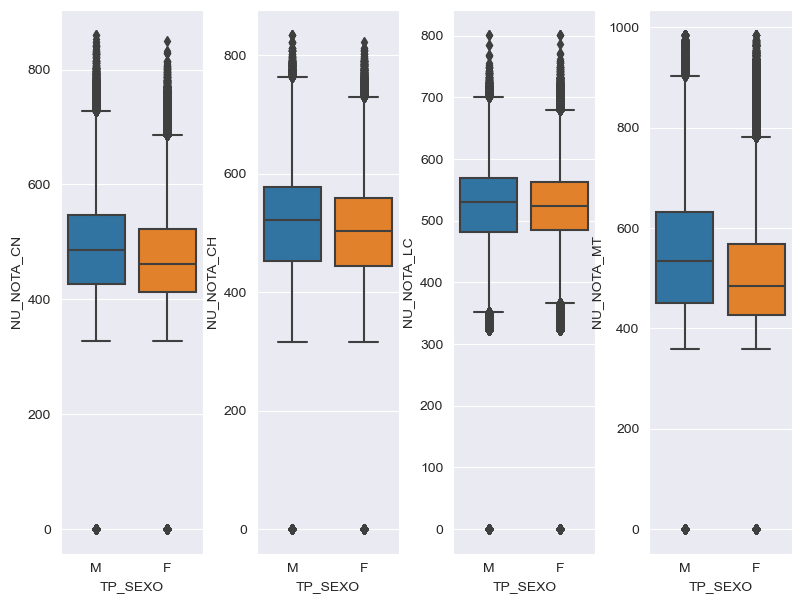

In [45]:
# Análisando as notas por sexo

sns.set_style('darkgrid')
figura,graficos = plt.subplots(1,4,sharex=True,figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna = coluna_notas[i]
    sns.boxplot(data=df_sexo,y=coluna,x='TP_SEXO',ax=graficos[i])

In [46]:
# Criando df com as notas e etnia dos candidatos

df_raca = df_enem.loc[:,coluna_notas +['TP_COR_RACA']]
df_raca.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,TP_COR_RACA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,483.80,503.60,537.30,392.00,120.00,120.00,120.00,100.00,0.00,460.00,1
4,513.60,575.50,570.70,677.00,160.00,120.00,180.00,200.00,200.00,860.00,1


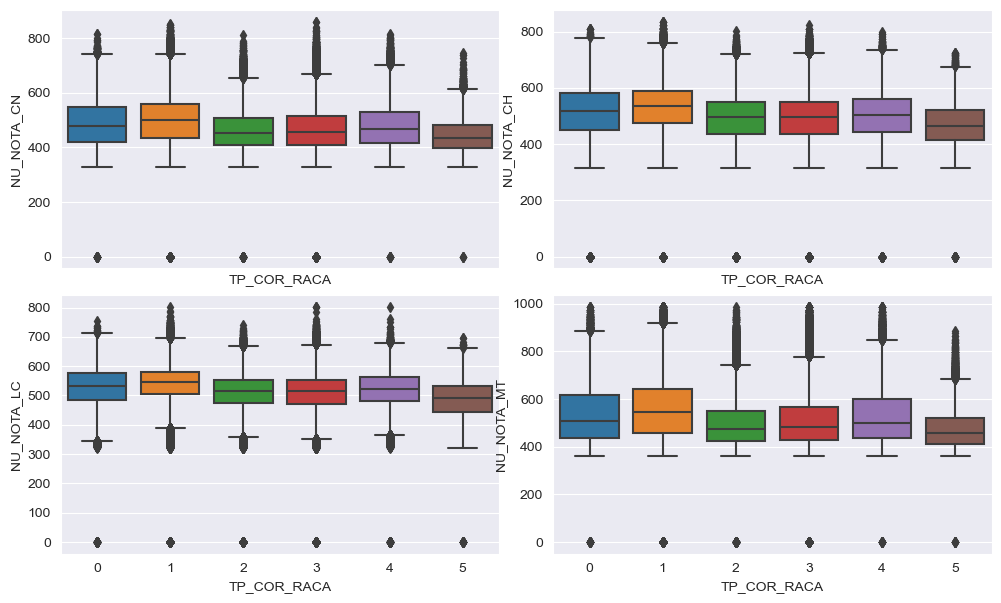

In [47]:
# Análisando as notas por etnia

sns.set_style('darkgrid')
figura,graficos = plt.subplots(2,2,sharex=True,figsize=(10,6))
plt.tight_layout()

for i in range(2):
    coluna_1 = coluna_notas[i*2]
    coluna_2 = coluna_notas[i*2+1]
    sns.boxplot(data=df_raca,y=coluna_1,x='TP_COR_RACA',ax=graficos[i][0])
    sns.boxplot(data=df_raca,y=coluna_2,x='TP_COR_RACA',ax=graficos[i][1])

In [48]:
# Criando df com as notas e nível de instrução dos pais e mãe

df_instrucao_pais = df_enem.loc[:,coluna_notas + ['pai_possui_superior','mae_possui_superior']]
df_instrucao_pais.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,pai_possui_superior,mae_possui_superior
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
3,483.80,503.60,537.30,392.00,120.00,120.00,120.00,100.00,0.00,460.00,False,False
4,513.60,575.50,570.70,677.00,160.00,120.00,180.00,200.00,200.00,860.00,False,False


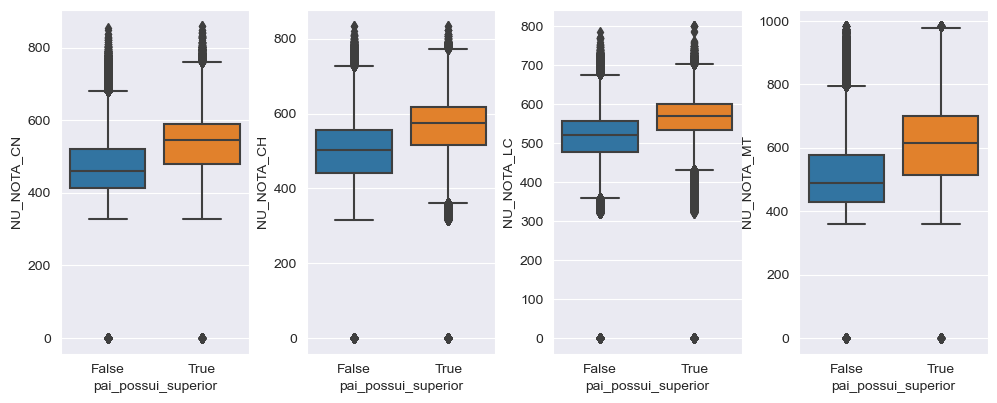

In [49]:
# Análisando gráficamente se o pai possuiu ensino superior ou não 

sns.set_style('darkgrid')
figura,graficos = plt.subplots(1,4,sharex=True,figsize=(10,4))
plt.tight_layout()

for i in range(4):
    coluna_1 = coluna_notas[i]
    sns.boxplot(data=df_instrucao_pais,y=coluna_1,x='pai_possui_superior',ax=graficos[i])

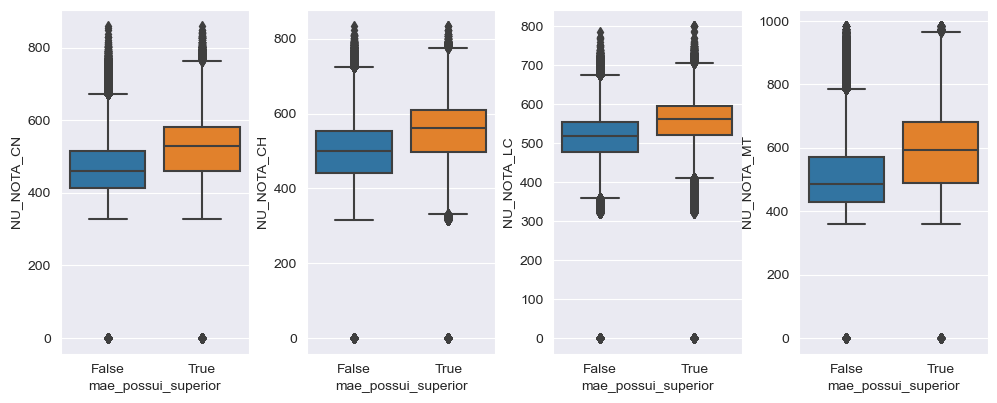

In [50]:
# Análisando gráficamente se o mãe possuiu ensino superior ou não 

sns.set_style('darkgrid')
figura,graficos = plt.subplots(1,4,sharex=True,figsize=(10,4))
plt.tight_layout()

for i in range(4):
    coluna_1 = coluna_notas[i]
    sns.boxplot(data=df_instrucao_pais,y=coluna_1,x='mae_possui_superior',ax=graficos[i])

In [51]:
# Análisando a correlação de pearson entre as notas

df_notas = df_enem.loc[:,coluna_notas ]
df_notas.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,483.80,503.60,537.30,392.00,120.00,120.00,120.00,100.00,0.00,460.00
4,513.60,575.50,570.70,677.00,160.00,120.00,180.00,200.00,200.00,860.00


<AxesSubplot: >

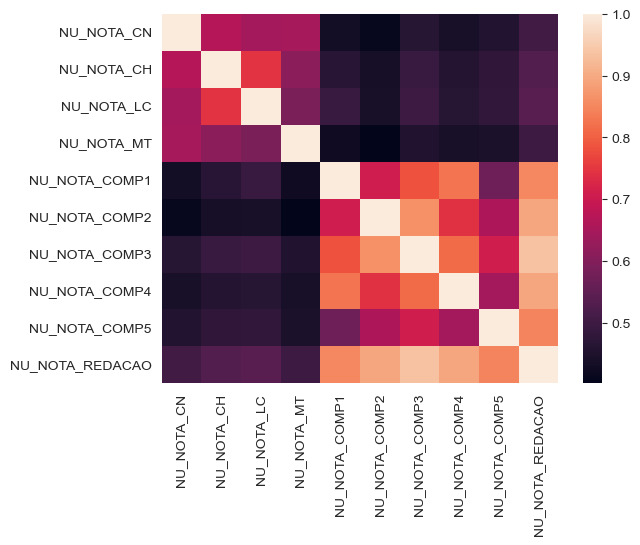

In [52]:
sns.heatmap(df_notas.corr())

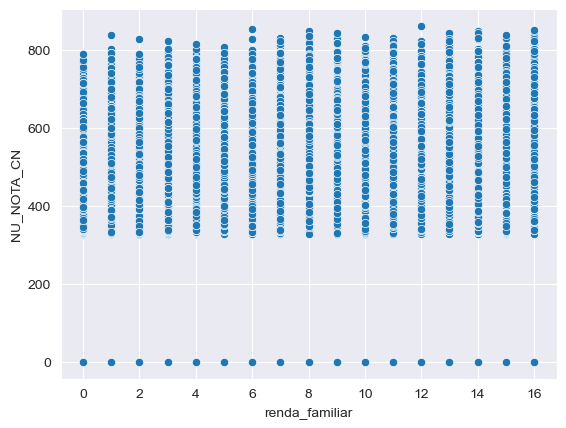

In [53]:
# Análisando a renda 

df_renda = df_enem.loc[:,coluna_notas+['renda_familiar']]
sns.scatterplot(data=df_renda,x='renda_familiar',y='NU_NOTA_CN');

<AxesSubplot: >

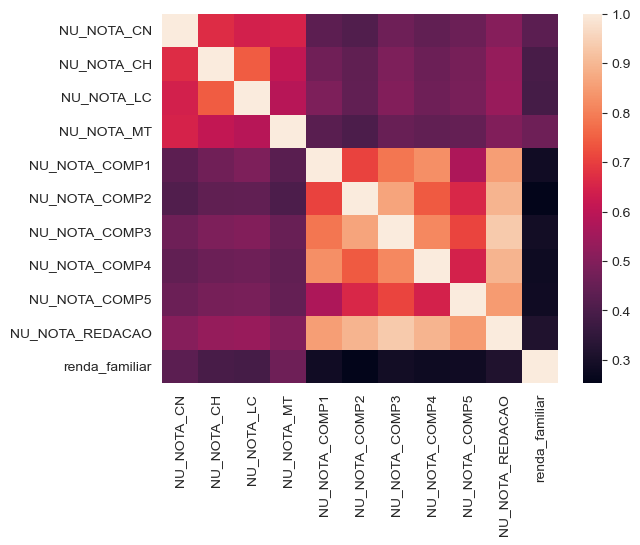

In [54]:
# Análisando a correlação de pearson entre as notas e a renda familiar
sns.heatmap(df_renda.corr())

## <a> Conclusões </a>

Depois de analisar os dados com o objetivo de avaliar possíveis relações entre características dos candidatos e as notas dos mesmos, podemos afirmar que existe alguma evidência de que há correlações entre as notas:
- raça (principalmente indígenas)
- escolaridade dos pais (notas de matemática muito influenciadas)
- renda familiar na nota de matemática (correlação pouco acima de 0,5)

Não pudemos confirmar com essa amostra que sexo, idade, atendimento especializado tem relação com as notas.

Ficou claro que a grande maioria dos candidatos é de origem "humilde" com renda familiar inferior a R$2.000,00

O candidato "padrão" do ENEM é mulher, com 18 anos, solteira, parda, com renda familiar inferior a R$1.500,00 com ambos pai e mãe sem ensino superior completo.